<a href="https://colab.research.google.com/github/cyloic/Data-Preprocessing-Formative/blob/main/notebooks/datamerge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Load Required Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [47]:
from google.colab import drive
import pandas as pd # Import pandas

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
trans = pd.read_csv('/content/drive/My Drive/customer_transactions - customer_transactions.csv')
social = pd.read_csv('/content/drive/My Drive/customer_social_profiles - customer_social_profiles.csv')

# Display first rows
print("Social Data Sample", social.head())
print("Transaction Data Sample", trans.head())

Social Data Sample   customer_id_new social_media_platform  engagement_score  \
0            A178              LinkedIn                74   
1            A190               Twitter                82   
2            A150              Facebook                96   
3            A162               Twitter                89   
4            A197               Twitter                92   

   purchase_interest_score review_sentiment  
0                      4.9         Positive  
1                      4.8          Neutral  
2                      1.6         Positive  
3                      2.6         Positive  
4                      2.3          Neutral  
Transaction Data Sample    customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 151            1001              408    2024-01-01   
1                 192            1002              332    2024-01-02   
2                 114            1003              442    2024-01-03   
3                 171     

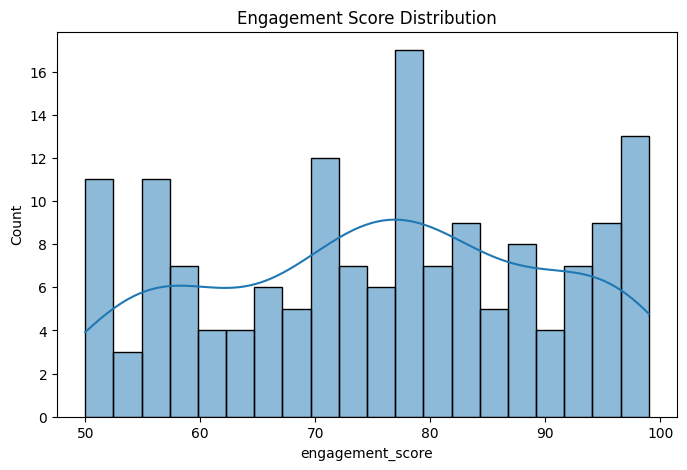

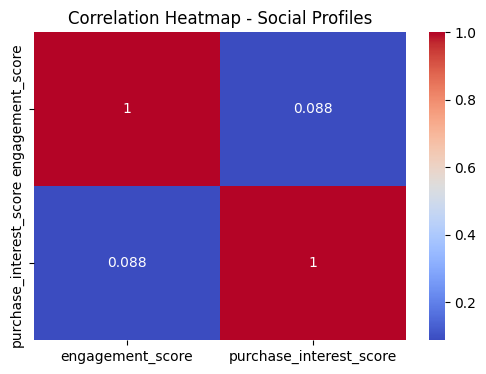

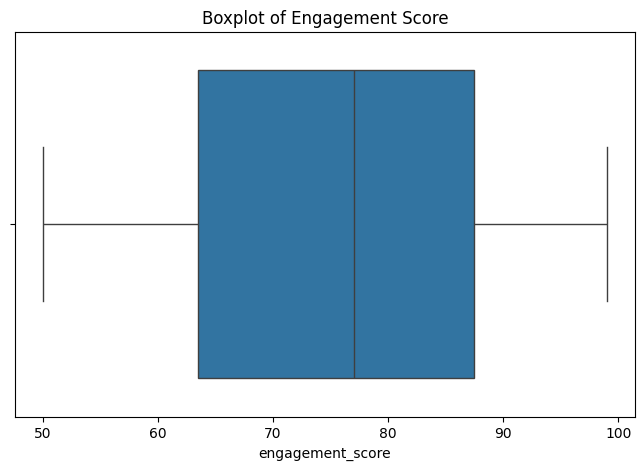

In [49]:
# Visual EDA for customer_social_profiles

# Histogram: Engagement score distribution
plt.figure(figsize=(8, 5))
sns.histplot(social['engagement_score'], bins=20, kde=True)
plt.title('Engagement Score Distribution')
plt.show()

# Correlation Heatmap (numerical only)
plt.figure(figsize=(6, 4))
sns.heatmap(social.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Social Profiles')
plt.show()

# Boxplot for engagement score
plt.figure(figsize=(8, 5))
sns.boxplot(x=social['engagement_score'])
plt.title('Boxplot of Engagement Score')
plt.show()

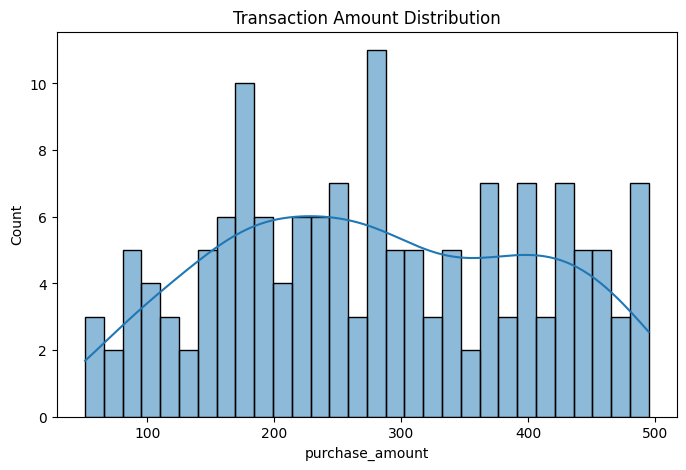

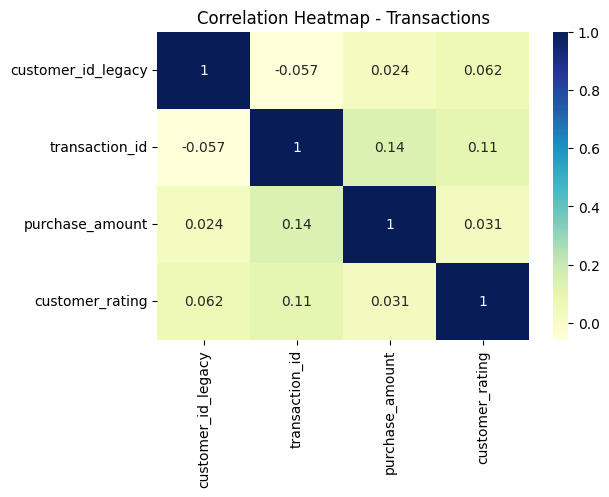

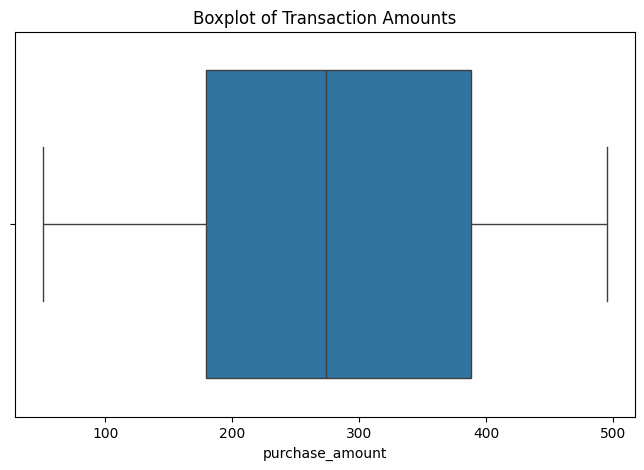

Social Profiles Description:
        engagement_score  purchase_interest_score
count        155.000000               155.000000
mean          75.606452                 3.152903
std           14.568021                 1.142867
min           50.000000                 1.000000
25%           63.500000                 2.350000
50%           77.000000                 3.200000
75%           87.500000                 4.100000
max           99.000000                 5.000000 

Transactions Description:
        customer_id_legacy  transaction_id  purchase_amount  customer_rating
count          150.000000      150.000000       150.000000        140.00000
mean           148.760000     1075.500000       280.780000          2.98500
std             30.046425       43.445368       121.329595          1.20699
min            100.000000     1001.000000        51.000000          1.00000
25%            121.250000     1038.250000       179.000000          1.95000
50%            150.500000     1075.500000   

In [50]:
# EDA for customer_transactions

# Histogram: Transaction amount
plt.figure(figsize=(8, 5))
sns.histplot(trans['purchase_amount'], bins=30, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Correlation Heatmap (numerical only)
plt.figure(figsize=(6, 4))
sns.heatmap(trans.select_dtypes(include='number').corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap - Transactions')
plt.show()

# Boxplot for amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=trans['purchase_amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()

# Display summary statistics
print("Social Profiles Description:\n", social.describe(), "\n")
print("Transactions Description:\n", trans.describe(), "\n")

# Display data types
print("Social Profiles Data Types:\n", social.dtypes, "\n")
print("Transactions Data Types:\n", trans.dtypes, "\n")

In [51]:
# 1. Handle nulls in customer_rating (from previous EDA)
print("Handling Nulls in customer_rating")
print("Before:\n", trans['customer_rating'].isnull().sum())

# Fill 'customer_rating' missing values with the mean
trans['customer_rating'] = trans['customer_rating'].fillna(trans['customer_rating'].mean())

print("After:\n", trans['customer_rating'].isnull().sum())

# 2. Remove duplicates (checking for duplicates as done before)
print("\nChecking for Duplicates")
print("social duplicates before removal:", social.duplicated().sum())
print("trans duplicates:", trans.duplicated().sum())

# Remove duplicates from social and create a clean copy
social = social.drop_duplicates().copy()
print("social duplicates after removal:", social.duplicated().sum())

# 3. Convert 'customer_id_new' to numeric for merging
social['customer_id_new_numeric'] = social['customer_id_new'].str.replace('A', '').astype(int)

# Justify Join Logic
# Merging the social profiles and transaction data using an inner join on customer ID
# to analyze customers present in both datasets.
# Proceed to merge
print("\nMerging Dataframes")
merged_data = pd.merge(social, trans, left_on='customer_id_new_numeric', right_on='customer_id_legacy', how='inner')

print("\nMerged dataset shape:", merged_data.shape)
print("Merged dataset sample:\n", merged_data.head())

# Feature Engineering

# Convert 'purchase_date' to datetime objects
merged_data['purchase_date'] = pd.to_datetime(merged_data['purchase_date'])

# Extract time-based features
merged_data['purchase_month'] = merged_data['purchase_date'].dt.month
merged_data['purchase_day_of_week'] = merged_data['purchase_date'].dt.dayofweek

# Aggregate features per customer
customer_agg = merged_data.groupby('customer_id_new_numeric').agg(
    total_purchase_amount=('purchase_amount', 'sum'),
    number_of_transactions=('transaction_id', 'count'),
    average_customer_rating=('customer_rating', 'mean')
).reset_index()


merged_data = pd.merge(merged_data, customer_agg, on='customer_id_new_numeric', how='left')

print("\nDataFrame after Feature Engineering:\n", merged_data.head())


# Save merged and engineered data
import os
merged_engineered_file_path = "merged_engineered_data.csv"
 # Create directory if it doesn't exist
merged_data.to_csv(merged_engineered_file_path, index=False)
print(f"\nMerged and engineered data saved to: {merged_engineered_file_path}")

Handling Nulls in customer_rating
Before:
 10
After:
 0

Checking for Duplicates
social duplicates before removal: 5
trans duplicates: 0
social duplicates after removal: 0

Merging Dataframes

Merged dataset shape: (213, 12)
Merged dataset sample:
   customer_id_new social_media_platform  engagement_score  \
0            A190               Twitter                82   
1            A190               Twitter                82   
2            A150              Facebook                96   
3            A150              Facebook                96   
4            A162               Twitter                89   

   purchase_interest_score review_sentiment  customer_id_new_numeric  \
0                      4.8          Neutral                      190   
1                      4.8          Neutral                      190   
2                      1.6         Positive                      150   
3                      1.6         Positive                      150   
4                      2

In [52]:
merged_data.describe()

,engagement_score,purchase_interest_score,customer_id_new_numeric,customer_id_legacy,transaction_id,purchase_amount,purchase_date,customer_rating,purchase_month,purchase_day_of_week,total_purchase_amount,number_of_transactions,average_customer_rating
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,75.596244,3.093427,147.676056,147.676056,1075.835681,289.807512,2024-03-15 20:03:22.816901376,3.070634,2.976526,2.863850,1727.535211,5.666667,3.070634
min,50.000000,1.000000,100.000000,100.000000,1001.000000,62.000000,2024-01-01 00:00:00,1.000000,1.000000,0.000000,91.000000,1.000000,1.100000
25%,63.000000,2.100000,117.000000,117.000000,1040.000000,179.000000,2024-02-09 00:00:00,2.100000,2.000000,1.000000,698.000000,3.000000,2.700000
50%,77.000000,3.200000,147.000000,147.000000,1074.000000,282.000000,2024-03-14 00:00:00,3.200000,3.000000,3.000000,1154.000000,4.000000,2.985000
75%,89.000000,4.100000,181.000000,181.000000,1115.000000,398.000000,2024-04-24 00:00:00,4.100000,4.000000,5.000000,2391.000000,9.000000,3.860000
max,99.000000,5.000000,199.000000,199.000000,1150.000000,495.000000,2024-05-29 00:00:00,5.000000,5.000000,6.000000,5589.000000,15.000000,5.000000
std,15.149145,1.160211,32.325632,32.325632,45.104138,119.323903,NaN,1.209302,1.445361,1.963165,1403.864150,3.827244,0.911816


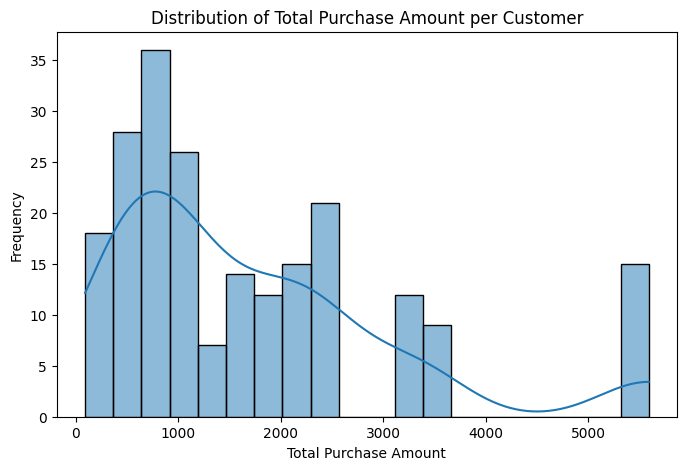

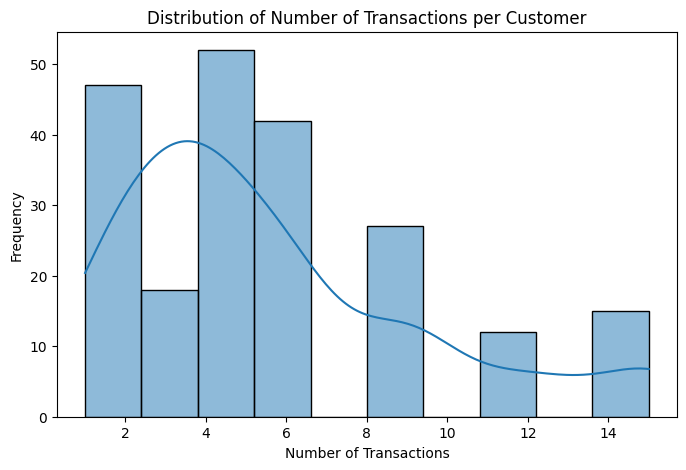

In [53]:
# Distribution of total_purchase_amount
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['total_purchase_amount'], bins=20, kde=True)
plt.title('Distribution of Total Purchase Amount per Customer')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of number_of_transactions
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['number_of_transactions'], bins=10, kde=True)
plt.title('Distribution of Number of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

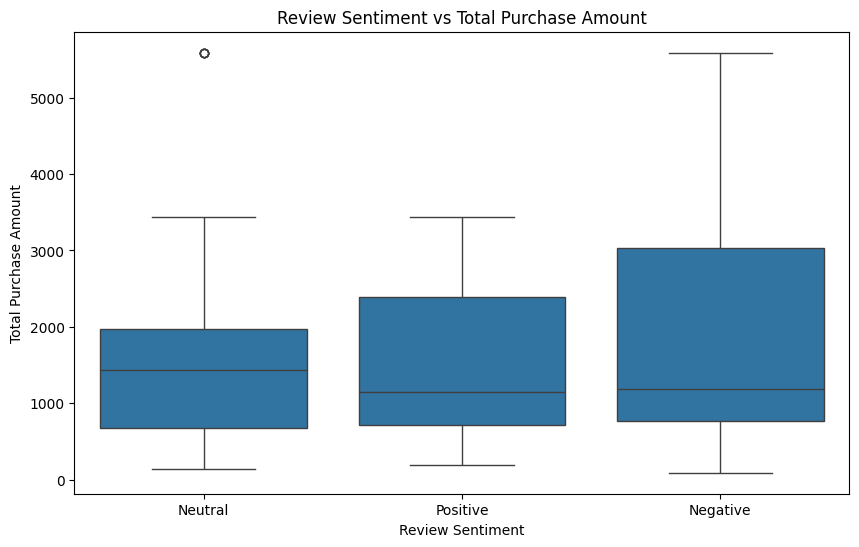

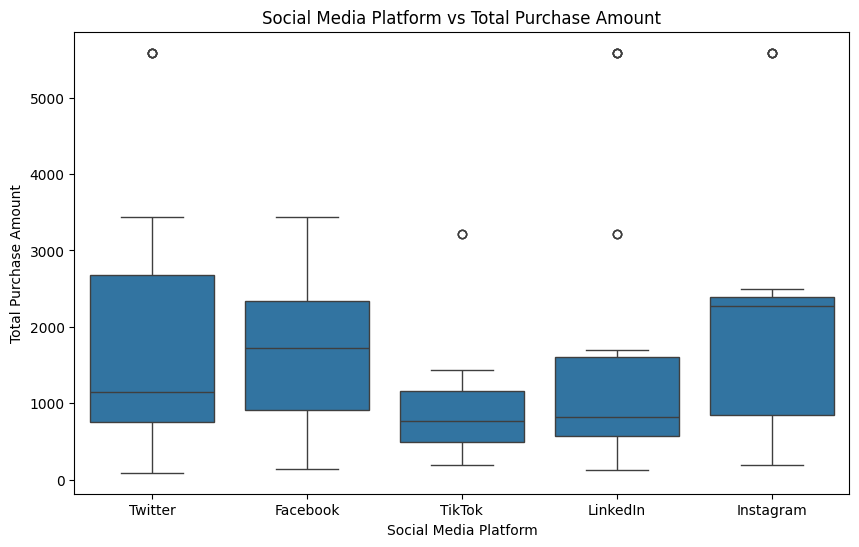

In [54]:
# Relationship between review_sentiment and total_purchase_amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_sentiment', y='total_purchase_amount', data=merged_data)
plt.title('Review Sentiment vs Total Purchase Amount')
plt.xlabel('Review Sentiment')
plt.ylabel('Total Purchase Amount')
plt.show()

# Relationship between social_media_platform and total_purchase_amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='social_media_platform', y='total_purchase_amount', data=merged_data)
plt.title('Social Media Platform vs Total Purchase Amount')
plt.xlabel('Social Media Platform')
plt.ylabel('Total Purchase Amount')
plt.show()

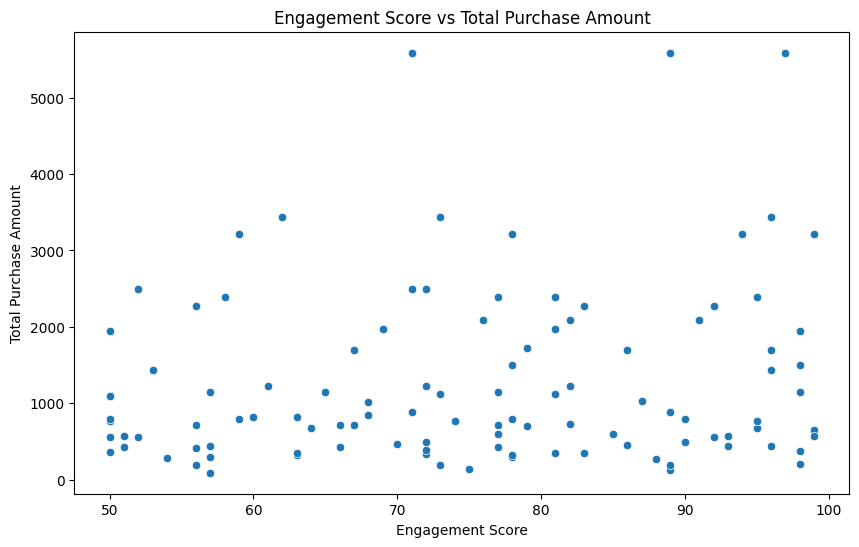

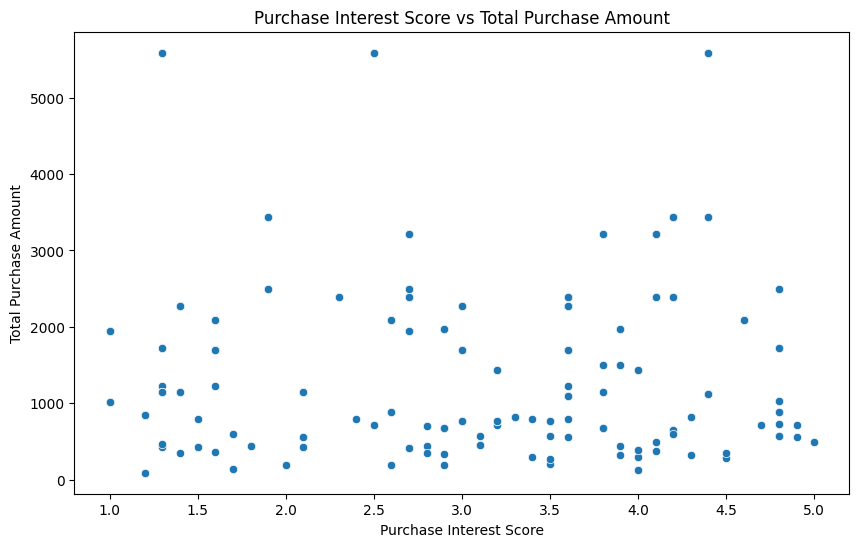

In [55]:
# Relationship between engagement_score and total_purchase_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engagement_score', y='total_purchase_amount', data=merged_data)
plt.title('Engagement Score vs Total Purchase Amount')
plt.xlabel('Engagement Score')
plt.ylabel('Total Purchase Amount')
plt.show()

# Relationship between purchase_interest_score and total_purchase_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='purchase_interest_score', y='total_purchase_amount', data=merged_data)
plt.title('Purchase Interest Score vs Total Purchase Amount')
plt.xlabel('Purchase Interest Score')
plt.ylabel('Total Purchase Amount')
plt.show()